In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, linear_model, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
a = tf.constant(2.0, dtype=tf.float64)
b = tf.constant(3.0, dtype=tf.float64)
c = a * b
c

<tf.Tensor 'mul_1:0' shape=() dtype=float64>

In [9]:
with tf.Session() as sess:
    c_ = sess.run(c)
    print(c_)

6.0


In [14]:
def add(a, b):
    c = a + b
    return c
add(2.0, 3.0)

5.0

In [13]:
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
c = a * b
with tf.Session() as sess:
    c_ = sess.run(c, feed_dict={a: 2.0, b:3.0 })
    print(c_)

6.0


In [6]:
a = tf.constant(2.0, shape=[2, 3], dtype=tf.float64)
a

<tf.Tensor 'Const_4:0' shape=(2, 3) dtype=float64>

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")

In [95]:
y = np.log(df.charges).values
print("type of y", type(y))
X = pd.get_dummies(df, drop_first=True)
del X["charges"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                    test_size = 0.3, random_state = 1) 
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)
print("train mse", metrics.mean_squared_error(y_train, lr.predict(X_train_std)), 
      "test mse", metrics.mean_squared_error(y_test, lr.predict(X_test_std)))
print("intercept", lr.intercept_, "coefficients", lr.coef_ )

type of y <class 'numpy.ndarray'>
train mse 0.204071649878 test mse 0.178811328333
intercept 9.0953369427 coefficients [ 0.47147365  0.08158994  0.115362   -0.04554678  0.62975311 -0.02392739
 -0.07216256 -0.06006463]


In [41]:
import requests
url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
exec(requests.get(url).text)

X Tensor("Placeholder_72:0", shape=(?, 8), dtype=float32)
y Tensor("Placeholder_73:0", shape=(?,), dtype=float32)
W <tf.Variable 'Variable_64:0' shape=(8, 1) dtype=float32_ref>
Z Tensor("add_32:0", shape=(?, 1), dtype=float32)
y_pred Tensor("Reshape_30:0", shape=(?,), dtype=float32)
mse Tensor("Mean_29:0", shape=(), dtype=float32)
y_train <class 'numpy.ndarray'>
84.1281
1.21717
0.228672
0.146214
0.139527
0.208506
0.142672
0.136793
0.207619
0.142412
0.170012
test mse 0.176728


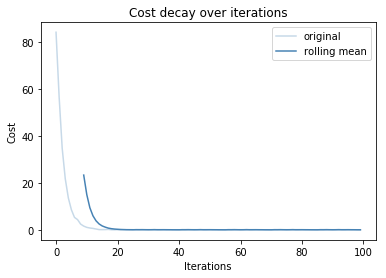

In [93]:
n_x = X_train_std.shape[1]
n_y = 1
max_iters = 100

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x])
y = tf.placeholder(dtype=tf.float32, shape=[None])

print("X", X)
print("y", y)

W = tf.Variable(tf.zeros(dtype=tf.float32, shape=[n_x, 1]))
print("W", W)

b = tf.Variable(tf.constant(0.0))

Z = tf.matmul(X, W) + b
print("Z", Z)

y_pred = tf.reshape(Z, shape=[-1])
print("y_pred", y_pred)

mse = tf.reduce_mean(tf.square(y - y_pred))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)\
                            .minimize(mse)

print("mse", mse)

with tf.Session() as sess:
    scores = {}
    sess.run(tf.global_variables_initializer())
    batchable = Batchable(X_train_std, y_train, batch_size=64)
    for i in range(max_iters):
        X_batch, y_batch = batchable.next()
        mse_, _ = sess.run([mse, optimizer], 
                feed_dict={X: X_batch, y:y_batch})
        scores[i] = mse_
        if i % (max_iters // 10) == 0 or i == max_iters-1:
            print(mse_)
    plot_scores(scores) 
    print("test mse", sess.run(mse, feed_dict={X: X_test_std, y:y_test}))

